# Math 578 Lab A1

Noah Marshall


This lab looks at matrix methods. The first section investigates the growth factor of Gaussian Elimination with Partial Pivoting defined by 

$$ g(A) = \frac{max_{i,j}|u_{ij}|}{max_{i,j}|a_{ij}|}$$

Where $PA = LU$





In [139]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Q2 Answer
def genMat(n,mu = 0,sigma = 1):
    return sigma*np.random.randn(n,n) + mu


# Q3 Function
def gelim(A):
    n = np.shape(A)[0]
    P = np.eye(n)
    L = np.eye(n).astype('float')
    U = A.astype('float')    
        
    for i in range(n):

        # If all values are 0 there is no solution
        if all(U[i:n,i] == 0):
            print('No Solution')
            return None
        
        # Find the row with maximum subcolumn index        
        p = np.argmax(abs(U[i:n,i]))
        p = p + i # Max row index
        
        # Swap rows, track permutations
        U[[i,p]] = U[[p,i]]
        P[[i,p]] = P[[p,i]]
        L[[i,p],0:i] = L[[p,i],0:i]

        
        # Reduce, track reduction
        for j in range(i+1,n):
            m = U[j,i]/U[i,i]
            L[j,i] = m
            U[j] = U[j,:] - m*U[i,:]


    return P,L,U
    
    
# Test if PLU Decomp worked    
A = np.array([[1,-1,3],
             [4,-2,1],
             [-3,-1,4]
             ])      

P,L,U = gelim(A)  # A matrix I found online 
print('LU')
print(L.dot(U))
print('PA')
print(P.dot(A))


A = genMat(4) # works for some dense matrix that is likely full rank
P,L,U = gelim(A)  
print('LU')
print(L.dot(U))
print('PA')
print(P.dot(A))


A = (np.eye(5)) # Should get the identity (ie nothing happens)
P,L,U = gelim(A)  
print('LU')
print(L.dot(U))
print('PA')
print(P.dot(A))

LU
[[ 4. -2.  1.]
 [-3. -1.  4.]
 [ 1. -1.  3.]]
PA
[[ 4. -2.  1.]
 [-3. -1.  4.]
 [ 1. -1.  3.]]
LU
[[ 1.29715638  0.21443491  1.30809353  0.09120403]
 [ 0.41804249  2.65492307 -0.34584008  0.83629517]
 [ 0.54017645 -1.14161729 -0.42793014  0.5206604 ]
 [-0.14198159 -0.67538617 -1.11255036 -0.77442825]]
PA
[[ 1.29715638  0.21443491  1.30809353  0.09120403]
 [ 0.41804249  2.65492307 -0.34584008  0.83629517]
 [ 0.54017645 -1.14161729 -0.42793014  0.5206604 ]
 [-0.14198159 -0.67538617 -1.11255036 -0.77442825]]
LU
[[ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.]]
PA
[[ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.]]


Ok, we have now implemented PLU decomposition and verified it worked on a number of matricies. 

Now let's do Question 4 and plot the growth factor as a function of matrix size. For each value of $n$ we will average the growth factor for a number of matricies. Computing power is limiting here so we will generate 7 random matricies for each value of $n$. This is about how long it took me to go for a 8k run and make lunch, which seems a reasonably generous number of matricies.



First, implement a function that returns the growth factor. 

In [116]:
def growth(A,U):
    maxA = np.max(abs(A))
    maxU = np.max(abs(U))
    
    return maxU / maxA

growthN = np.zeros(1001)
start = time.time()
for n in range(1000,10,-1):
    print('{}/{}'.format(n,990))
    ga = []
    for k in range(7): 
        A = genMat(n)
        P,L,U = gelim(A)
        ga.append(growth(A,U))
        
    growthN[n] = (np.mean(ga))
    
t = time.time() - start
np.save('growthFile_2',growthN)
print('Time taken (m): ' + str(t/60))

1000/990
999/990
998/990
997/990
996/990
995/990
994/990
993/990
992/990
991/990
990/990
989/990
988/990
987/990
986/990
985/990
984/990
983/990
982/990
981/990
980/990
979/990
978/990
977/990
976/990
975/990
974/990
973/990
972/990
971/990
970/990
969/990
968/990
967/990
966/990
965/990
964/990
963/990
962/990
961/990
960/990
959/990
958/990
957/990
956/990
955/990
954/990
953/990
952/990
951/990
950/990
949/990
948/990
947/990
946/990
945/990
944/990
943/990
942/990
941/990
940/990
939/990
938/990
937/990
936/990
935/990
934/990
933/990
932/990
931/990
930/990
929/990
928/990
927/990
926/990
925/990
924/990
923/990
922/990
921/990
920/990
919/990
918/990
917/990
916/990
915/990
914/990
913/990
912/990
911/990
910/990
909/990
908/990
907/990
906/990
905/990
904/990
903/990
902/990
901/990
900/990
899/990
898/990
897/990
896/990
895/990
894/990
893/990
892/990
891/990
890/990
889/990
888/990
887/990
886/990
885/990
884/990
883/990
882/990
881/990
880/990
879/990
878/990
877/990
876/990

Running the above code takes a while. So we limit our number of samples to 7. We plot seperately to avoid re-running the code too often. 

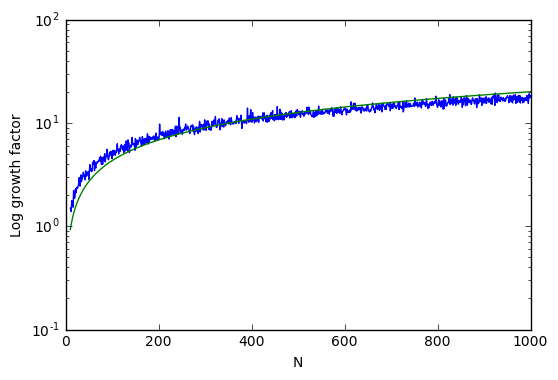

In [167]:
growthN = growthN[growthN != 0] # Get rid of the zeros from initialization

a = 2/3
c = 0.2

fit = [c*n**a for n in range(10,1000)]

plt.plot(range(10,1000),growthN)
plt.plot(range(10,1000),fit)
plt.xlabel('N')
plt.ylabel('Log growth factor')
plt.yscale('log')
plt.show()

When assuming $g \approx cn^\alpha$ this experiment suggests that when doing Gaussian elimination with partial pivoting on matricies with values iid sampled from random standard normal distributions that the growth factor grows roughly as a polynomial of degree 

$$\alpha =2/3$$ 

Further experiments would be needed to be more certain of this value. Although this does not suggest this relationship holds outside of $[10,1000]$ it is certainly promising for most use cases of gaussian elimination with partial pivoting.

This is far far better than the worst case scenario of growing like an base 2 exponential. For comparison I have plotted below the curves $cn^\alpha$ where $c= 1/5, \alpha = 2/3$ and $2^n$ on log scale. See just how much quicker the worst case scenario grows.


//anaconda/lib/python3.5/site-packages/matplotlib/ticker.py:1597: RuntimeWarning: overflow encountered in power
  ticklocs = b ** decades


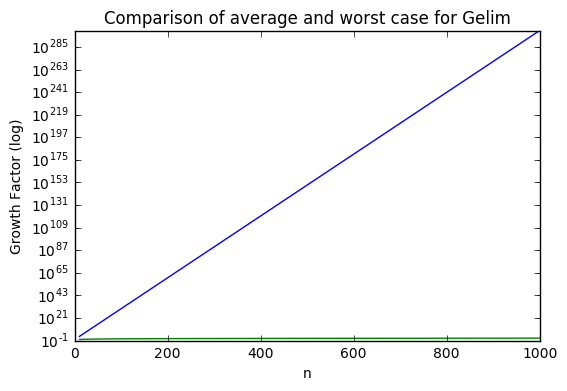

In [169]:
worst = [2**n for n in range(10,1000)] # so fast it overflows :(
plt.plot(range(10,1000),worst)
plt.plot(range(10,1000),fit)
plt.title('Comparison of average and worst case for Gelim')
plt.xlabel('n')
plt.ylabel('Growth Factor (log)')
plt.yscale('log')
plt.show()

Now, let's get a feel for the probability distribution. We need enough samples to get a reasonably good histogram so we choose smaller values of $n$ for efficiency. I've experimented a little and found a good trade-off between accuracy and not burning my computer to be $\approx 1000$.

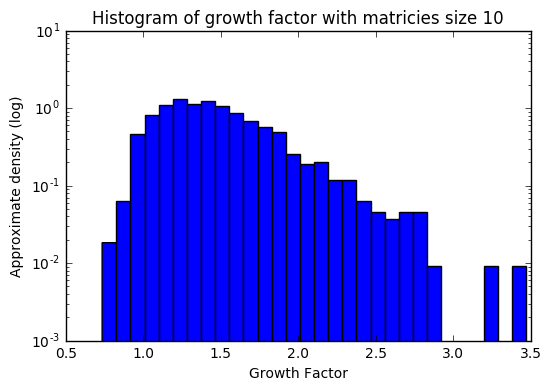

In [26]:
n_values = [10]
n_samples = 1200
for n in n_values:
    ga = []
    for k in range(n_samples): # takes a while already with 10 per n
        A = genMat(n)
        P,L,U = gelim(A)
        ga.append(growth(A,U))
        
    plt.figure() # Create new figure for each n
    plt.hist(ga,30, normed=True) # I'll let python choose the number and size of bins
    plt.title('Histogram of growth factor with matricies size {}'.format(n))
    plt.ylabel('Approximate density (log)')
    plt.xlabel('Growth Factor')
    plt.yscale('log', nonposy='clip')
    plt.show()

It appears that the density decays exponentially as growth factor increases. This is easy to tell as the y-axis is on a log scale and it looks to be decaying linearly in the plot. Of course, it's only a conjecture right now. 

We can repeat this experiment now with different values of $n$. 

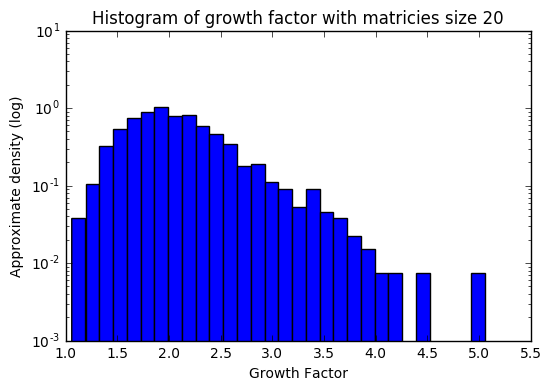

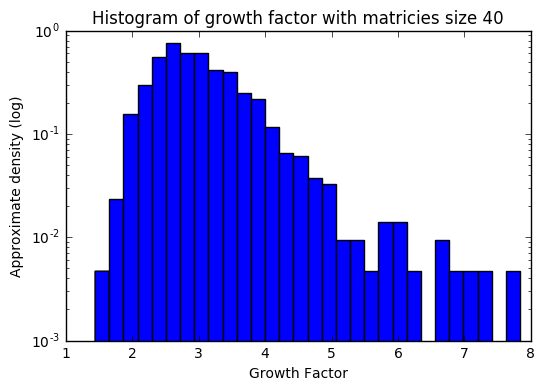

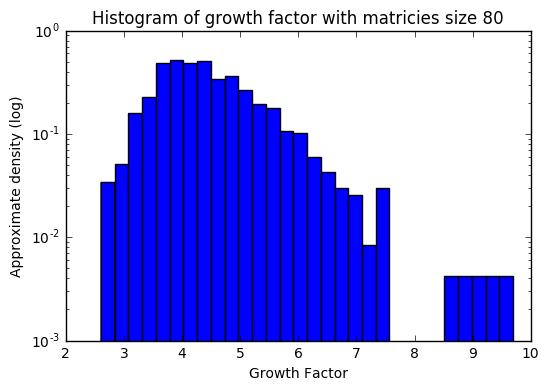

In [30]:
n_values = [20,40,80]
n_samples = 1000
for n in n_values:
    ga = []
    for k in range(n_samples): # takes a while already with 10 per n
        A = genMat(n)
        P,L,U = gelim(A)
        ga.append(growth(A,U))
        
    plt.figure() # Create new figure for each n
    plt.hist(ga,30, normed=True) # I'll let python choose the number and size of bins
    plt.title('Histogram of growth factor with matricies size {}'.format(n))
    plt.ylabel('Approximate density (log)')
    plt.xlabel('Growth Factor')
    plt.yscale('log', nonposy='clip')
    plt.show()

After repeating the experiment with $n = 20,40,80$ I am more sure of the conjecture that the density decays exponentially as the growth factor increases. Clearly, we start to lack samples for very high growth factors, but in the high density region it is clear that the density decays exponentially. 

## Part 2

Now we will be solving $Ax=b$ with steepest descent and CG.

Condition number: 3942.9624167


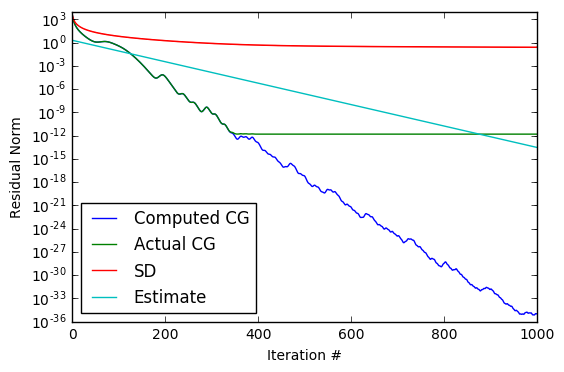

In [112]:
# First let's create a function to make A and b as described in the question

def makeAb(): # we don't do this much so we can be inefficient 
    A = np.eye(1000)
    for i in range(999):
        A[i,i] = i+1
        A[i-1,i] = 1
        A[i+1,i] = 1

    A[998,999] = 1 # The above code misses two spots, fill them in
    A[999,999] = 1000
    return A,np.ones(1000)


# Question 1
def steepestDescent(A,b,x,iters):
    resNorm = np.zeros(iters)
    r = b - A.dot(x)
    for i in range(iters):
        Ar = A.dot(r) # for efficiency
        a = (np.transpose(r).dot(r)) / (np.transpose(r).dot(Ar))
        x = x + a*r
        r = r - a*Ar
        resNorm[i] = np.linalg.norm(r) # Compute residual norms as well
        
        
    return x,resNorm

# Question 2
def cg(A,b,x,iters):
    compResNorm = np.zeros(iters)
    actualNorm = np.zeros(iters)
    r = b - A.dot(x)
    p = r    
    for i in range(iters):
        Ap = A.dot(p) # for efficiency
        a = (np.transpose(p).dot(r)) / (np.transpose(p).dot(Ap))
        x = x + a*p
        r = r - a*Ap
        beta = np.transpose(Ap).dot(r) / np.transpose(Ap).dot(p)
        p = r - beta*p
        
        resNorm[i] = np.linalg.norm(r) # Compute residual norms as well
        actualNorm[i] = np.linalg.norm(b - A.dot(x))
        
    return x,resNorm,actualNorm
        
    
# Setup for question 3
iters= 1000
A,b = makeAb() 
condition = np.linalg.cond(A)
print('Condition number: ' + str(condition))
sqrtk = np.sqrt(condition) # for cleaner algebra

x,compResNorm_cg,actualResNorm_cg = cg(A,b,b,iters) # Use b as an initial guess
x,resNorm_sd = steepestDescent(A,b,b,iters)
estimate = [2 * ((sqrtk - 1) / (sqrtk + 1))**i for i in range(1,1001)]


plt.plot(compResNorm_cg)
plt.plot(actualResNorm_cg)
plt.plot(resNorm_sd)
plt.plot(estimate)
plt.legend(['Computed CG','Actual CG','SD','Estimate'],loc = 'lower left')
plt.xlabel('Iteration #')
plt.ylabel('Residual Norm')
plt.yscale('log')
plt.show()

Comments:

A is a reasonable conditioned matrix with $\kappa = 3942.9624167$. From what I've found searching this value is neither particulary good or bad. 

The steepest descent method works well at first and then slows down drastically. It clearly performed much worse that CG did. Both methods are easy to implement and similiarly efficient. There really seems to be no real situation in which SD would be preferable to CG. 

The conjugate gradient method converges extremely fast. It is interesting to note how the actual CG residuals and the computed CG residuals diverge drastically around 390 iterations. At this point the CG method stops converging at all despite the computed CG residuals shrinkings quickly. This well known problem of CG is caused by cumulative rounding errors that eventually prevent the search directions from being $A$-conjugate. This could be remedied by occasionally replacing the actual residuals with the computed residuals. 

We see that CG converges quicker than the rate of the estimate. This is expected as the estimate is only an inequality. Again it's interesting to note that once CG breaks down this estimate no longer holds. One would have to be cautious to ensure CG does not break down if a good bound on your solution error is required. 